In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
conds = [2, 10]
dist = [0, 3]
q = 9

**Вариант №41**
$$\begin{cases}
    -u'' + 9u = f(x); \quad x \in (0, 3), \\
    u(0) = 2, \\
    u(3) = 10   
\end{cases}.$$
Найдём аналитическое решение данной задачи при $f(x) = 0$:
$$\begin{cases}
    u(x) = C_{1}e^{3x} + C_{2}e^{-3x}, \\
    u(0) = C_1 + C_2 = 2, \\
    u(3) = C_{1}e^{9} + C_{2}e^{-9} = 10
\end{cases} \Leftrightarrow 
\begin{cases}
    C_1 = \frac{10 - 2e^{-9}}{e^9 - e^{-9}}, \\
    C_2 = \frac{2e^{9} - 10}{e^9 - e^{-9}}
\end{cases}.$$
Таким образом, аналитическое решение при $f(x) = 0$ имеет вид:
$$u(x) = \frac{10 - 2e^{-9}}{e^9 - e^{-9}} \cdot e^{3x} + \frac{2e^{9} - 10}{e^9 - e^{-9}} \cdot e^{-3x}.$$

In [11]:
def solve(x):
    c1 = (10 - 2 * np.exp(-9)) / (np.exp(9) - np.exp(-9))
    c2 =  (2 * np.exp(9) - 10) / (np.exp(9) - np.exp(-9))
    return c1 * np.exp(3 * x) + c2 * np.exp(-3 * x)

Построим явную разностную схему 2-го порядка точности:

Пусть 
$$\begin{gather*}
    u''(x_i) = \frac{u_{i + 1} - 2u_i + u_{i - 1}}{h^2},\\
    u(x_i) = u_i, \\
\end{gather*}$$
тогда разностная схема имеет вид:
$$\begin{cases}
    -\frac{u_{i + 1} - 2u_i + u_{i - 1}}{h^2} + qu_i = f(x_i), \\
    u_0 = u_a, \quad u_N = u_b
\end{cases}, \quad 1 \leqslant i \leqslant N-1.$$
При $f(x) = 0$ (отсутствии источника тепла):
$$\begin{cases}
    u_0 = u_a, \\
    -\frac{1}{h^2}u_0 + (\frac{2}{h^2} + q)u_1 -\frac{1}{h^2}u_2 = 0, \\
    -\frac{1}{h^2}u_1 + (\frac{2}{h^2} + q)u_2 -\frac{1}{h^2}u_3 = 0, \\
    ... \\
    u_N = u_b
\end{cases}$$

In [12]:
def build_A(q, dist, n):
    h = (dist[1] - dist[0]) / (n - 1)
    A = np.zeros([n, n])

    A[0, 0] = 1
    A[n - 1, n - 1] = 1
    for i in range(1, n - 1):
        A[i, i - 1] = -1.0 / h**2
        A[i, i] = 2.0 / h**2 + q
        A[i, i + 1] = -1.0 / h**2
    return A

def build_homogen_b(conds, n):
    b = np.zeros(n)

    b[0] = conds[0]
    b[n - 1] = conds[1]
    return b

Произведем расчет разностой схемы по 11 точкам, т.е. при $n = 11$

In [13]:
x = np.linspace(dist[0], dist[1], 11, endpoint = True)
A = build_A(q, dist, 11)
b = build_homogen_b(conds, 11)

res = np.linalg.solve(A, b)

Построим график приближенного решения

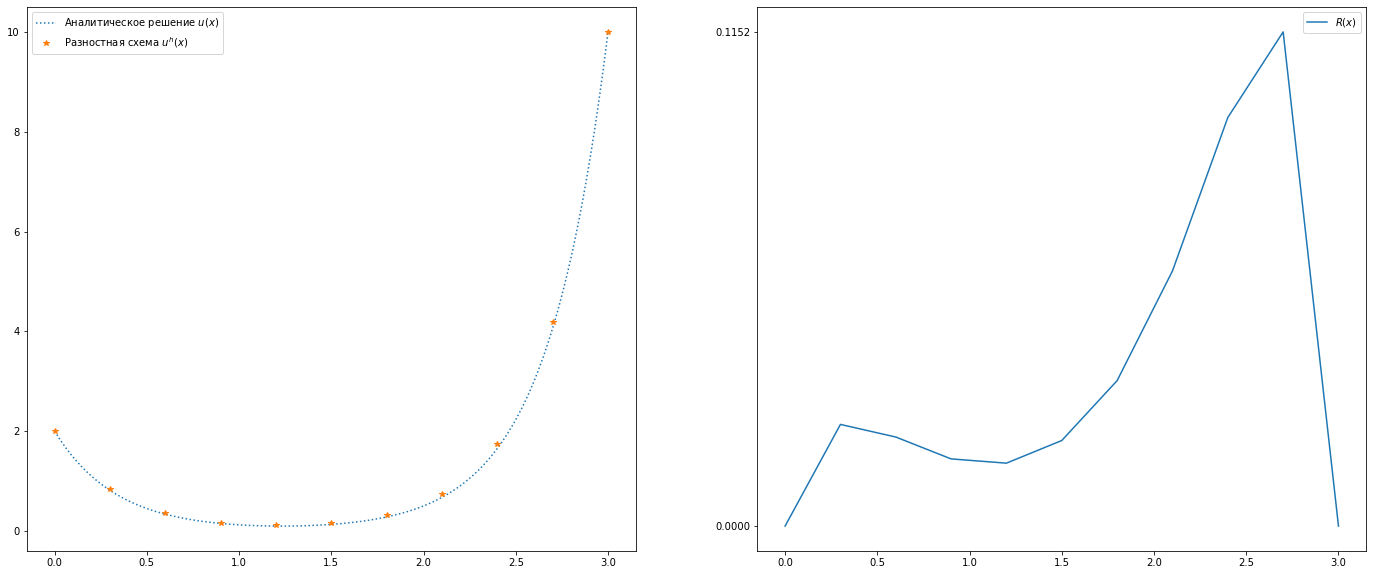

In [14]:
fig, axs = plt.subplots(1, 2, figsize = (24, 10))

# Аналитическое решение
x_plot = np.linspace(dist[0], dist[1], 200, endpoint = True)
axs[0].plot(x_plot, solve(x_plot), ls = 'dotted', label = "Аналитическое решение $u(x)$")
# Решение через разностную схему
axs[0].plot(x, res, ls = "", marker = "*", label = "Разностная схема $u^{h}(x)$")

# Погрешность
R = np.abs(res - solve(x))
axs[1].plot(x, R, label = "$R(x)$")
axs[1].set_yticks([0, np.max(R)])

axs[0].legend()
axs[1].legend()
plt.show()

Определим величину погрешности как $R = \max|u(x_i) - y_i|$, тогда величина ногрешности $R = 0.1152$